### ROAD ACCIDENT SEVERITY MODEL USING LINEAR REGRESSION

#### The work flow

**1.importing the necessary libraries:-**
Pandas - read dataframe
Scikit-Learn - for model creation, training. 
Seaborn/Matplotlib - for data visualization.
TensorFlow 

**2.Data preparation:-**
Checking of missing values and replacing them
Checking for anormalies in the data set - will use scatter plot & box plot to check for outliers.
Summary statistics - Mean, mode, Median. 

**3.Get the dependet values and independent values**

Dependent Variable -> accident Severity - Is the accident {Minor, Moderate, Severe, Fatal}. 

Independent variables - number of casualties, casualty severity,  accident_severity, light condition 

**4.Split the data to training and test data**

**5.Create the model and train it**

**6.Test the model - hypothetical variables**

->Educational level - what level of education is the driver involved in the road accident. 

->Vehicle relationship - are most drivers involved in road accidents owners or employess.

->Weather condition - Do most accidents occur on a normal or rainy weather.

->Road surface type - Do most accidents occur on asphalt, gravel, earth etc...

->Road surface condition - Do most accidents occur on dry or wet/Dump roads.



In [30]:
#importing the modules. 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import tensorflow as tf  

#LOADING THE DATA SET
df = pd.read_csv('road_accident_severity_dataset.csv')

df


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,service_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casualty,Fitness_of_casualty,Pedestrian_movement,Cause_of_accident,Injury_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [31]:
print( df.shape, df.size)

(12316, 32) 394112


In [32]:
import matplotlib.pyplot as plt 
import plotly.express as px
#Histogram for Number of casualties and the road surface types 
px.histogram(df,df['Road_surface_type'], df['Number_of_casualties'],color='Road_surface_type', template='plotly_dark')


In [33]:
#Pie chart for Injury severity and Number of casualties
px.pie(df,df['Injury_severity'],df['Number_of_casualties'],color='Injury_severity',template='plotly_dark',hole=0.3)

In [34]:
#histogram for Vehicle driver relationship
px.histogram(df,df['Vehicle_driver_relation'], df['Number_of_casualties'],color='Vehicle_driver_relation', template='plotly_dark')

In [35]:
#Histogram for road surface conditions and the number of casualties 
px.histogram(df,df['Road_surface_conditions'], df['Number_of_casualties'],color='Road_surface_conditions', template='plotly_dark')

In [36]:
#DATA PREPARATION 
#1.Checking for missing values 
null_values_1 = df .isnull().sum()
print('The Columns and the number of Null values:\n', null_values_1)

The Columns and the number of Null values:
 Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
service_of_vehicle             3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity   

In [37]:
#From the above outputs ....Dropping all the unwanted columns

df.drop(['Time','Day_of_week','Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience',
'Type_of_vehicle','Owner_of_vehicle','service_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment',
'Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement',
'Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Pedestrian_movement','Cause_of_accident','Work_of_casualty',
'Fitness_of_casualty'], axis=1, inplace=True)

df.head(20)

 


,Number_of_vehicles_involved,Number_of_casualties,Injury_severity
0,2,2,Slight Injury
1,2,2,Slight Injury
2,2,2,Serious Injury
3,2,2,Slight Injury
4,2,2,Slight Injury
5,1,1,Slight Injury
6,1,1,Slight Injury
7,2,1,Slight Injury
8,2,1,Slight Injury
9,2,1,Serious Injury


In [38]:
#Checking for any existing columns with Null values
null_values_2 = df.isnull().sum()
print('The Columns and the number of Null values:\n', null_values_2)

The Columns and the number of Null values:
 Number_of_vehicles_involved    0
Number_of_casualties           0
Injury_severity                0
dtype: int64


In [39]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Number_of_vehicles_involved  12316 non-null  int64 
 1   Number_of_casualties         12316 non-null  int64 
 2   Injury_severity              12316 non-null  object
dtypes: int64(2), object(1)
memory usage: 288.8+ KB


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [40]:
# LABEL ENCODING - This is to allow the model to work with string values.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = l.fit_transform(df[col])
df


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



,Number_of_vehicles_involved,Number_of_casualties,Injury_severity
0,2,2,2
1,2,2,2
2,2,2,1
3,2,2,2
4,2,2,2
...,...,...,...
12311,2,1,2
12312,2,1,2
12313,1,1,1
12314,2,1,2


In [41]:
#SPLITTING THE DATA TO x and y 
x=df.drop('Injury_severity',axis=1)
x

,Number_of_vehicles_involved,Number_of_casualties
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
12311,2,1
12312,2,1
12313,1,1
12314,2,1


In [42]:
y=df['Injury_severity']
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Injury_severity, Length: 12316, dtype: int32

In [43]:
#MODEL BUILDING 
from sklearn.model_selection import train_test_split
#Random size - a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

x_train

,Number_of_vehicles_involved,Number_of_casualties
6013,2,1
10050,3,5
9346,1,1
8724,2,1
11295,2,1
...,...,...
79,2,1
12119,2,1
8039,2,1
6936,2,1


In [44]:
x_test

,Number_of_vehicles_involved,Number_of_casualties
9498,1,1
3270,2,1
7914,2,1
9659,2,1
5206,2,3
...,...,...
9772,2,1
4776,1,2
8241,2,3
11358,2,2


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\

LinearRegression()

In [46]:
# The naming convention allows the model to make the recall based on the data that it has been trained using.
y_lr_train_pred = lr.predict(x_train) 
y_lr_test_pred = lr.predict(x_test)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\

In [47]:
y_lr_train_pred


array([1.84305507, 1.79155949, 1.77692901, ..., 1.84305507, 1.84305507,
       1.84305507])

In [48]:
y_lr_test_pred

array([1.77692901, 1.84305507, 1.84305507, ..., 1.78424425, 1.81364966,
       1.94590178])

In [53]:
#EVALUATION OF THE MODEL.
#mse = is used to check how close the estimates are to the actual values. 
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
# lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
# lr_test_r2 = r2_score(y_test, y_lr_test_pred)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [54]:
print(f'LR MSE (Train):{lr_train_mse:.2f}')
# print(f'LR R2 (Train):{lr_train_r2:.1f}')
print(f'LR MSE (Test): {lr_test_mse:.2f}')
# print(f'LR MSE (Test):{lr_test_r2:.1f}')

LR MSE (Train):0.17
LR MSE (Test): 0.15


Text(0.5, 0, 'Experimental Logs')

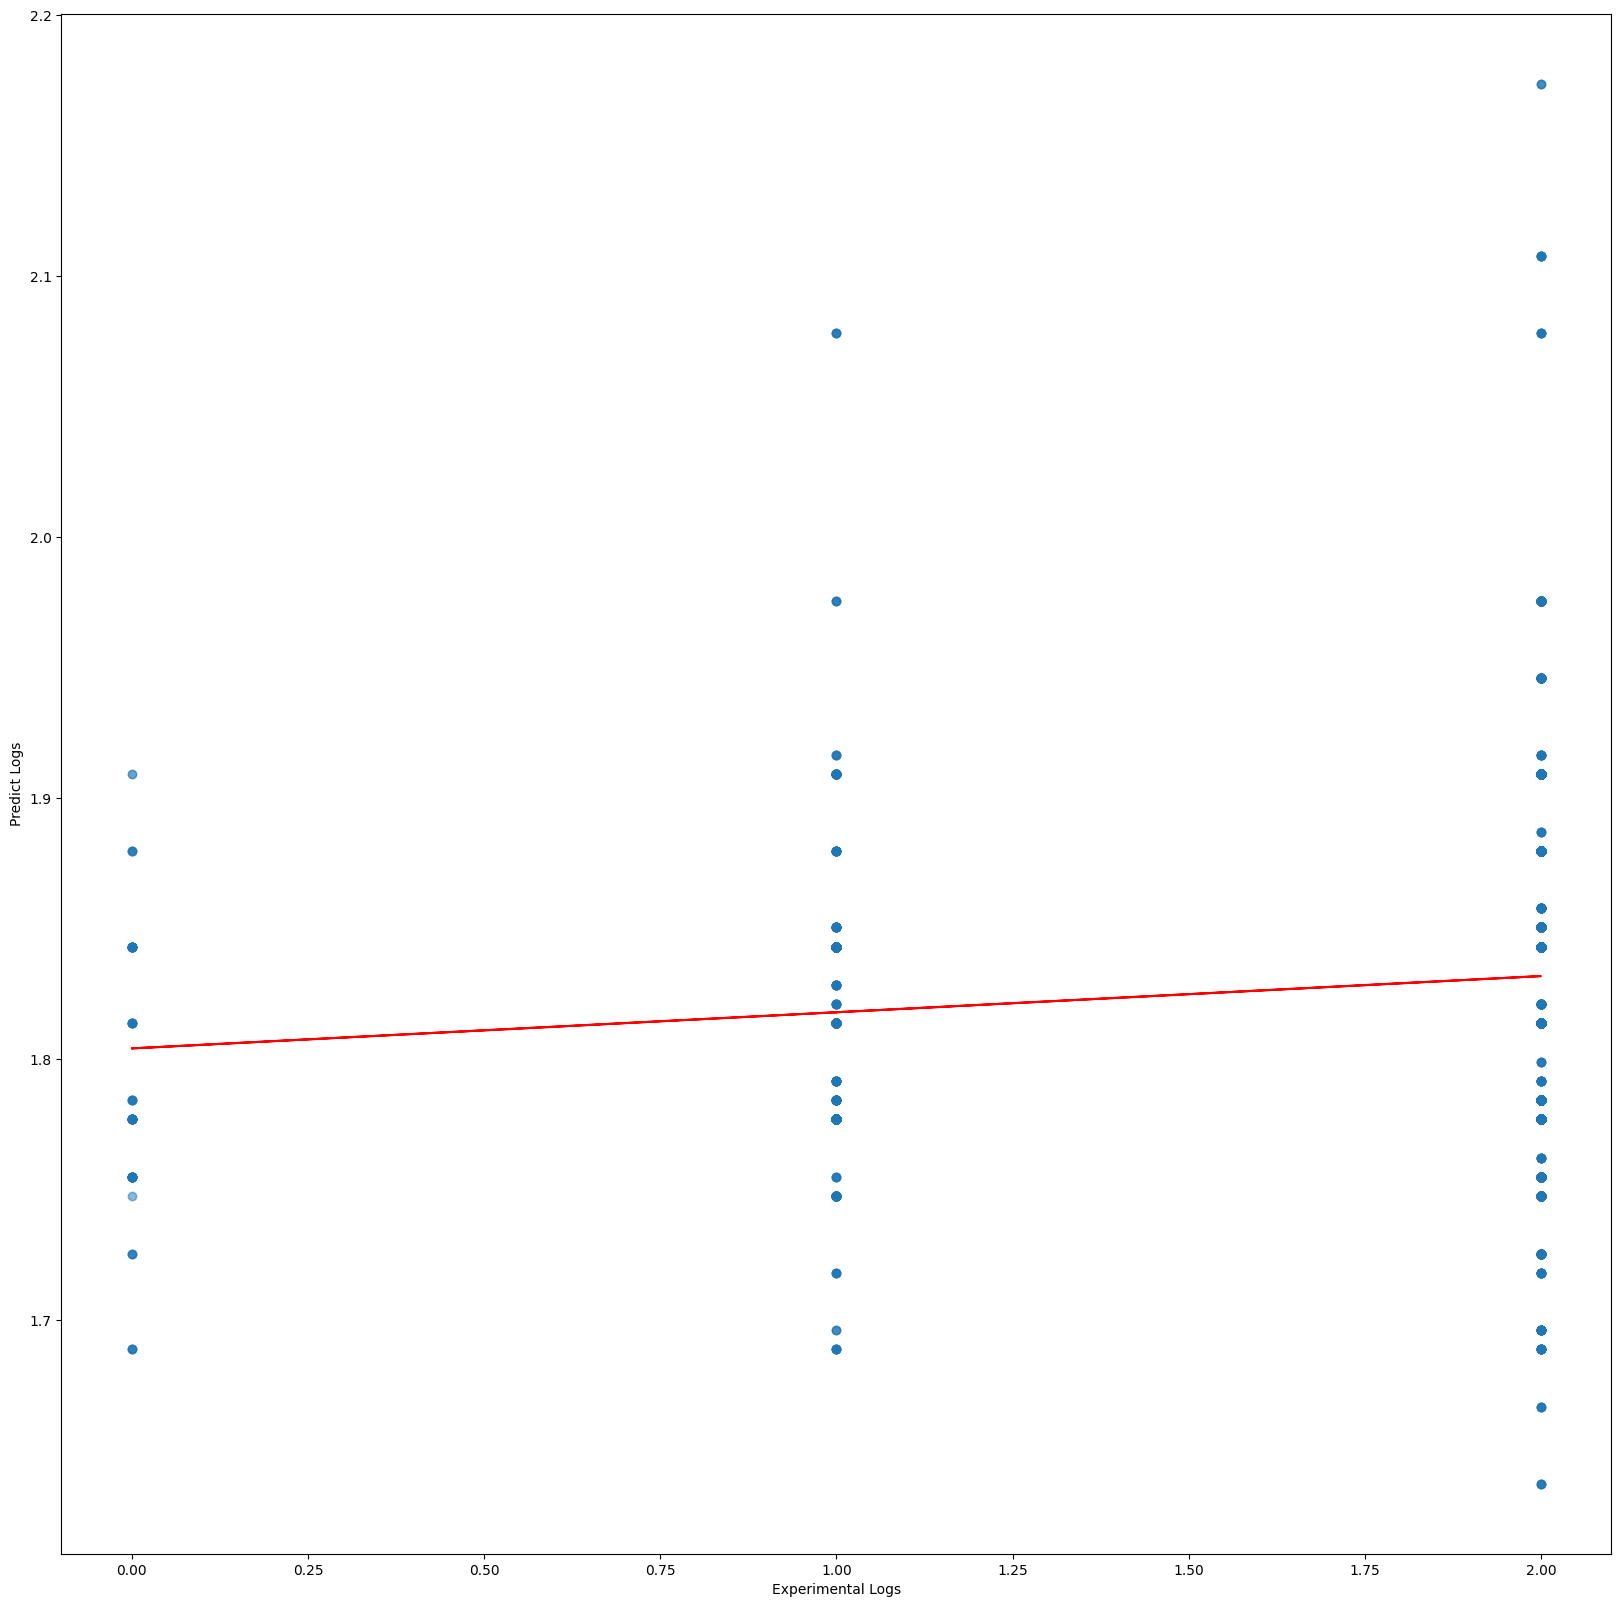

In [55]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure(figsize=(20,10))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Red')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')